In [1]:
data_path = '/Users/apple/Desktop/Machine_Learning/project/Audio/data_audi/data_prepared'

In [2]:
data=read.table(paste(data_path,'/sample_selected_R.csv',sep=''),sep=',',header = TRUE,quote = '\n')

In [3]:
data_in = data[,c('name', 'vowel','word',  'stress', 'F1', 'F2','F3', 'B1', 'B2', 'B3',  'dur','F1.20.', 'F2.20.', 'F1.35.', 'F2.35.' ,'F1.50.', 'F2.50.', 'F1.65.', 'F2.65.', 'F1.80.', 'F2.80.' ,'label')]

In [74]:
all_word = unique(data_in$word)
all_vowel = unique(data_in$vowel)
data_in$label = factor(data_in$label)

In [96]:
p_value_6 = c()
p_value_all = c()
for (vow in all_vowel){
    vowel_manova <- manova(cbind(F1, F2, F3, B1, B2, B3)~ label, data = data_in[data_in$vowel==vow,])
    p_value_6 = c(p_value,as.numeric(summary(vowel_manova,test = "Hotelling-Lawley")$stats[1, "Pr(>F)"]))
    vowel_manova <- manova(cbind(F1, F2, F3, B1, B2, B3,dur, F1.20.,F2.20.,F1.35.,F2.35.,F1.50.,F2.50.,F1.65.,F2.65.,F1.80.,F2.80.)~ label, data = data_in[data_in$vowel==vow,])
    p_value_all = c(p_value,as.numeric(summary(vowel_manova,test = "Hotelling-Lawley")$stats[1, "Pr(>F)"]))
}

In [95]:
vowel_manova = data.frame(all_vowel,p_value_6,p_value_all)

In [103]:
length(unique(data_in[data_in$word=='IN',]$label))

[1] 2

In [116]:
p_value_6 = c()
p_value_all = c()
for (word in all_word){
    if (length(unique(data_in[data_in$word==word,]$label))>1){
        word_manova <- manova(cbind(F1, F2, F3, B1, B2, B3)~ label, data = data_in[data_in$word==word,])
        p_value_6 = c(p_value,as.numeric(summary(word_manova,test = "Hotelling-Lawley")$stats[1, "Pr(>F)"]))
        #word_manova <- manova(cbind(F1, F2, F3, B1, B2, B3,F1.20.,F2.20.,F1.35.,F2.35.,F1.50.,F2.50.,F1.65.,F2.65.,F1.80.,F2.80.)~ label, data = data_in[data_in$word==word,])
        #p_value_all = c(p_value,as.numeric(summary(word_manova,test = "Hotelling-Lawley")$stats[1, "Pr(>F)"]))
        }
}

ERROR: Error in summary.manova(word_manova, test = "Hotelling-Lawley"): residuals have rank 4 < 6


In [63]:
t.test(F1 ~ label, data = data_in[data_in$vowel=='AH',])


	Welch Two Sample t-test

data:  F1 by label
t = -40.644, df = 668910, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.425505 -7.650284
sample estimates:
mean in group -1  mean in group 1 
        466.9855         475.0234 


In [71]:
t.test(F1 ~ label, data =data_in )


	Welch Two Sample t-test

data:  F1 by label
t = -44.479, df = 1861400, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.284250 -6.669384
sample estimates:
mean in group -1  mean in group 1 
        490.8723         497.8491 


In [27]:
install.packages('gridExtra')
library(gridExtra)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [58]:
data_word = data_in[data_in$word=='EXACT',]
data_word$label = factor(data_word$label)

In [51]:
data_vowel = data_in[data_in$vowel=='IH',]
data_vowel$label = factor(data_vowel$label)

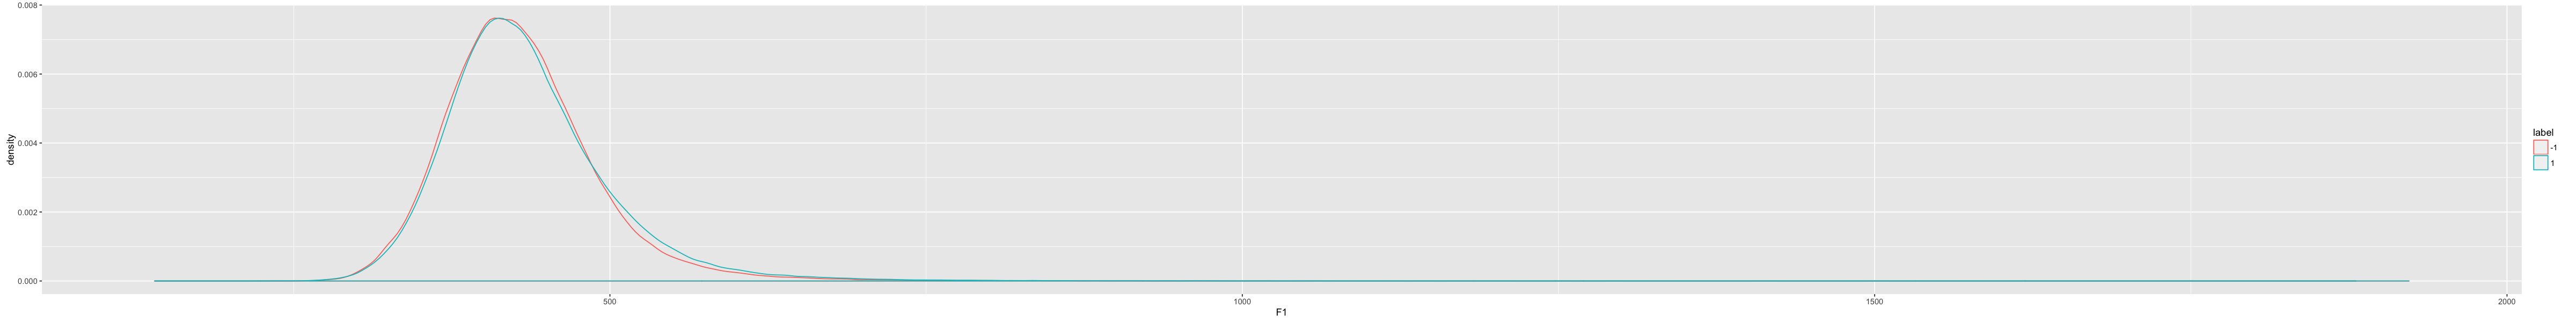

In [66]:
options(repr.plot.width=40, repr.plot.height=5)
ggplot(data_vowel, aes(F1,color=label)) + geom_density() 

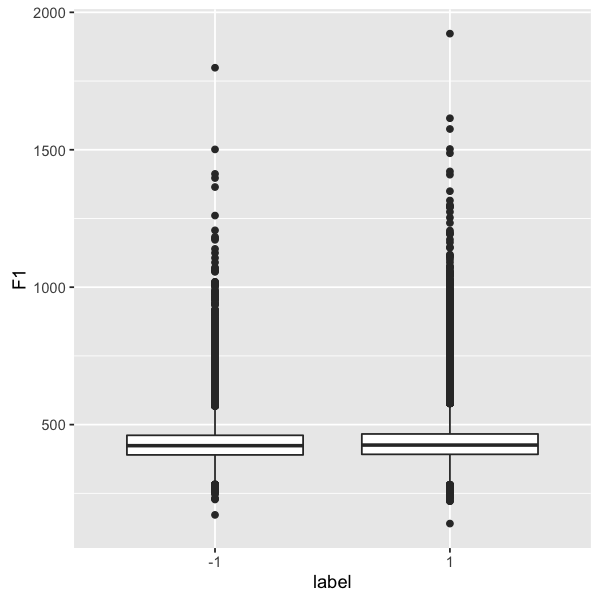

In [53]:
ggplot(data_word, aes(label, F1)) + geom_boxplot() 